# 시계열 분석 (Time Series Analysis)

- 시계열: 보통 동일한 시간 간격마다 측정한 데이터(x축: 시간, y축: 측정 데이터)
- 독립 변수로 오직 시간만 존재
- 과거에 관측한 값들을 기반으로 미래의 값 예측
- 활용 예: 과거 행위 분석, 현재 성취도 분석, 미래 예측 및 계획 수립에 활용

# Components of Time Series
- Trend: 장기간에 걸쳐서 지속적으로 증가/감소/유지하는 성향
- Seasonality: 고정된 시간 주기마다 반복되는 패턴 (예: 아이스크림 판매)
- Irregularity: 규칙성 X, 예측 불가능, 우연적으로 발생, 짧게 발생 (예: 홍수, 파업..)
- Cyclic: 상하로 반복되나 패턴 고정 X, 보통 주기가 1년 이상 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [3]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
dataset.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [4]:
dataset.set_index('Month', inplace = True)
timeseries = dataset['#Passengers']
timeseries.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

c:\users\piljoo choi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


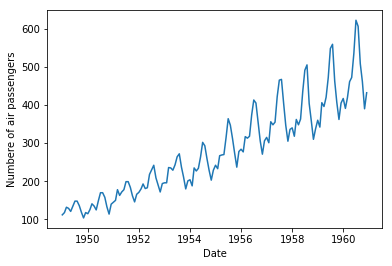

In [5]:
plt.xlabel('Date')
plt.ylabel('Numbere of air passengers')
plt.plot(timeseries)

# Stationarity (정상성)
- 비유동적임을 의미
- 모델링이 쉽고 과거 데이터를 기반으로 미래 예측이 쉬움

### * Stationarity 조건
- Constant mean: 시간에 따라 평균이 고정적이어야 함
- Constant variance: 시간 간격마다 변화량이 일정해야 함
- Autocovariance: 시간에 의존적이지 않음

* Autocovariance: 특정 시간 간격만큼 이동시킨 자기자신과의 공분산

### * Stationarity 확인
- Rolling statistics: 시간이 흐름에 따라 평균과 분산의 변화를 그려  변화하는지 평가
- Dickey-Fuller Test: non-stationary하다는 귀무 가설 테스트. 귀무 가설에 대해 테스트 후 얻은 test statistic과 critical value를 비교하여 test statistic가 크면 가설이 틀린 것으로 판단하여 stationarity 판명

# Stationarity 판별하기

- Trend: 시간의 흐름에 따라 증가함 → non-stationary


## Stationaryty 판별법 적용

In [6]:
rolmean = timeseries.rolling(window=12).mean()
rolstd  = timeseries.rolling(window=12).std() #standard deviation
print(rolmean, rolstd)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

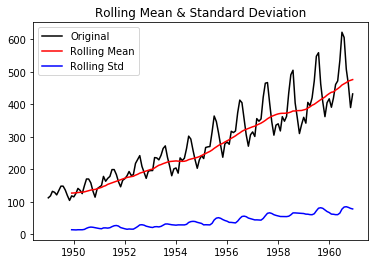

In [7]:
#Plot rolling statistics
plt.plot(timeseries, color = 'black', label = 'Original')
plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
plt.plot(rolstd, color = 'blue', label = 'Rolling Std')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

In [8]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(timeseries, autolag = 'AIC')
df_test

(0.8153688792060406,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
df_result = pd.Series(df_test[:4], 
    index = ['Test Statistic', 'p-valaue', '#Lags used', '#Observations used'])
for key, value in df_test[4].items():
    df_result['Critical values (%s)' % key] = value

df_result

Test Statistic             0.815369
p-valaue                   0.991880
#Lags used                13.000000
#Observations used       130.000000
Critical values (1%)      -3.481682
Critical values (5%)      -2.884042
Critical values (10%)     -2.578770
dtype: float64

## 가설이 틀릴 조건
- p-value: 0.05보다 작어야 함
- Critical values: Test Statistic 값보다 커야함

In [10]:
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd  = timeseries.rolling(window=12).std() #standard deviation

    #Plot rolling statistics:
    plt.plot(timeseries, color = 'black', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolstd, color = 'blue', label = 'Rolling Std')
    plt.title("Rolling Mean & Standard Deviation")
    plt.legend()
    plt.show()

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    df_test = adfuller(timeseries, autolag='AIC')
    df_result = pd.Series(df_test[:4], 
        index = ['Test Statistic', 'p-valaue', '#Lags used', '#Observations used'])
    for key, value in df_test[4].items():
        df_result['Critical values (%s)' % key] = value
    print (df_result)

test_stationarity(timeseries)

# Component 추출하기

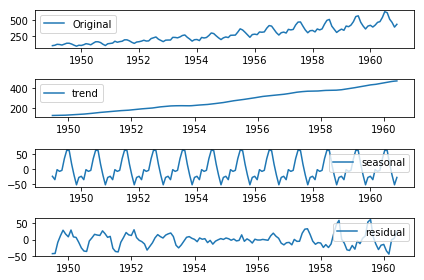

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(timeseries)

trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid #잔차

plt.subplot(411); plt.plot(timeseries, label = 'Original'); plt.legend()
plt.subplot(412); plt.plot(trend, label = 'trend'); plt.legend()
plt.subplot(413); plt.plot(seasonal, label = 'seasonal'); plt.legend()
plt.subplot(414); plt.plot(residual, label = 'residual'); plt.legend()
plt.tight_layout()

# ARIMA(AR + I + MA)

### ARIMA 모델의 의미
- 시계열 분석에 사용되는 대표적인 수리적 모형
- 자기회귀모형(AR, Auto Regression): 이전 값이 이후의 값에 영향을 미치는 경향
- 이동평균 모형(MA, Moving Average): 변수의 평균값이 지속적으로 증가하거나 감소화는 경향

### 필요한 입력변수
- p: AR에 필요한 autoregressive lags → PACF(Partial autocorrelation graph)로 결정
- d: I에 필요한 order of differentiation → ACF(Autocorrelation graph)로 결정
- q: MA에 필요한 moving average

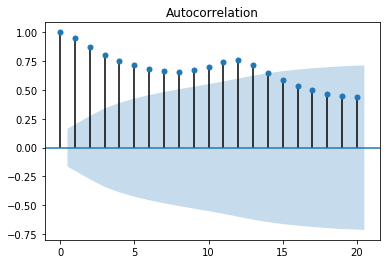

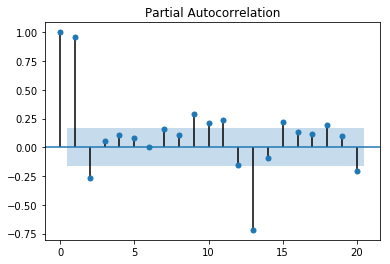

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(timeseries, lags = 20)
plot_pacf(timeseries, lags = 20)
plt.show()

In [13]:
timeseries_diff1 = timeseries.diff(periods = 1).dropna()

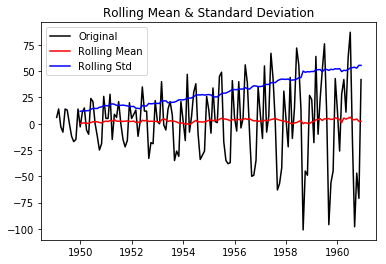

<Results of Dickey-Fuller Test>
Test Statistic            -2.829267
p-valaue                   0.054213
#Lags used                12.000000
#Observations used       130.000000
Critical values (1%)      -3.481682
Critical values (5%)      -2.884042
Critical values (10%)     -2.578770
dtype: float64


In [14]:
test_stationarity(timeseries_diff1)

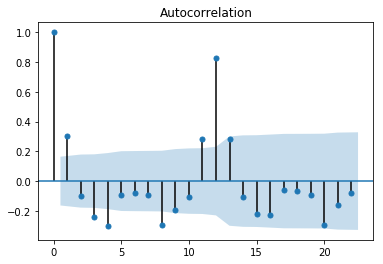

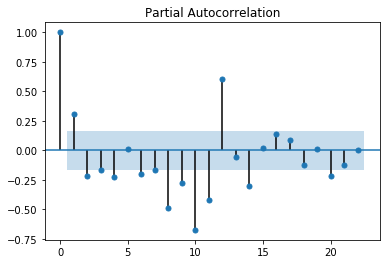

In [15]:
plot_acf(timeseries_diff1)
plot_pacf(timeseries_diff1)
plt.show()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(timeseries, order = (2, 1, 2))
fit = model.fit(trend = 'c', disp = -1) 
fit.summary()

c:\users\piljoo choi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\piljoo choi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Tue, 06 Aug 2019   AIC                           1344.043
Time:                        11:41:12   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.527      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9998      0.068     14.811      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [17]:
print('Sum(R^2):', np.sum(fit.resid**2))

Sum(R^2): 89787.05318356302


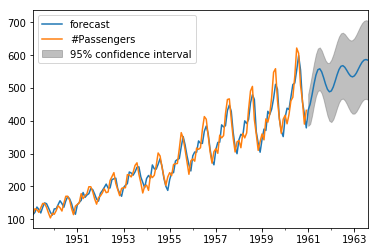

In [18]:
fit.plot_predict(end = '1963-08-01')
plt.show()

In [19]:
fit.forecast(steps = 10)

(array([433.10902642, 450.86859474, 479.78513435, 511.94330609,
        539.29668454, 555.78519429, 558.74091437, 549.27886267,
        531.66246762, 511.90266692]),
 array([24.71202286, 30.70942638, 32.23158701, 32.2801079 , 32.49895866,
        32.97657601, 33.1691927 , 33.19978351, 34.10709378, 36.79361374]),
 array([[384.67435163, 481.5437012 ],
        [390.67922504, 511.05796444],
        [416.61238464, 542.95788405],
        [448.67545718, 575.21115499],
        [475.59989603, 602.99347305],
        [491.15229298, 620.41809559],
        [493.73049129, 623.75133745],
        [484.2084827 , 614.34924264],
        [464.8137922 , 598.51114304],
        [439.78850912, 584.01682472]]))

### log 적용

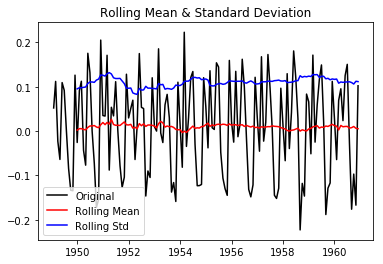

<Results of Dickey-Fuller Test>
Test Statistic            -2.717131
p-valaue                   0.071121
#Lags used                14.000000
#Observations used       128.000000
Critical values (1%)      -3.482501
Critical values (5%)      -2.884398
Critical values (10%)     -2.578960
dtype: float64


In [20]:
timeseries_Log = np.log(timeseries)
timeseries_LogDiff = timeseries_Log.diff().dropna()
test_stationarity(timeseries_LogDiff)

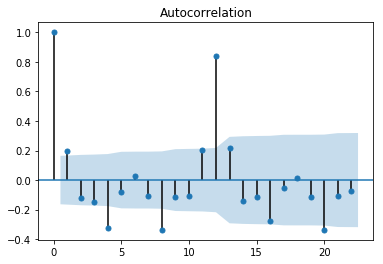

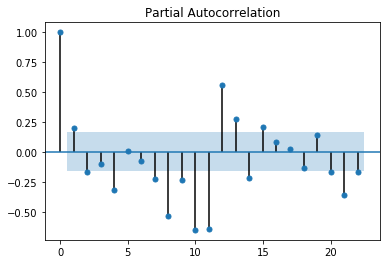

In [21]:
plot_acf(timeseries_LogDiff)
plot_pacf(timeseries_LogDiff)
plt.show()

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(timeseries_Log, order = (2, 1, 1))
fit = model.fit(trend = 'c', disp = -1) 
fit.summary()

c:\users\piljoo choi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\piljoo choi\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 140.076
Method:                       css-mle   S.D. of innovations              0.090
Date:                Tue, 06 Aug 2019   AIC                           -270.151
Time:                        11:41:13   BIC                           -255.337
Sample:                    02-01-1949   HQIC                          -264.131
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0101      0.000     23.509      0.000       0.009       0.011
ar.L1.D.#Passengers     0.9982      0.076     13.162      0.000       0.850       1.147
ar.L2.D.#Passengers    -0.4134      0.077     -5.384      0.000      -0.564      -0.263
ma.L1.D.#Passengers    -1.0000      0.028    -35.273      0.000      -1.056      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2073           -0.9805j            1.5553           -0.1086
AR.2            1.2073           +0.9805j            1.5553            0.1086
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

* ARIMA 함수의 order의 p, d, q 값을 바꿔가며 해보기

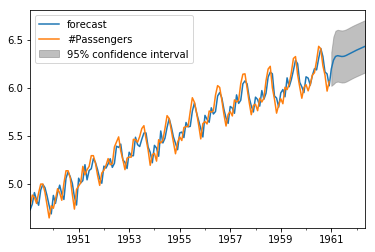

In [26]:
fit.plot_predict(1, 160)
plt.show()

In [24]:
fit.forecast(steps = 12)

(array([6.19673742, 6.28672204, 6.32768519, 6.33555881, 6.33066764,
        6.32671392, 6.32897308, 6.33704654, 6.34835549, 6.3604905 ,
        6.37211253, 6.38288097]),
 array([0.08950683, 0.12647241, 0.13681939, 0.13765749, 0.13780774,
        0.1383906 , 0.13875155, 0.13883229, 0.13883353, 0.13884034,
        0.1388498 , 0.13885379]),
 array([[6.02130727, 6.37216758],
        [6.03884068, 6.53460341],
        [6.05952412, 6.59584627],
        [6.06575509, 6.60536253],
        [6.06056943, 6.60076585],
        [6.05547332, 6.59795452],
        [6.05702505, 6.60092111],
        [6.06494025, 6.60915282],
        [6.07624677, 6.62046421],
        [6.08836843, 6.63261258],
        [6.09997193, 6.64425313],
        [6.11073255, 6.65502938]]))

12903230.414540885


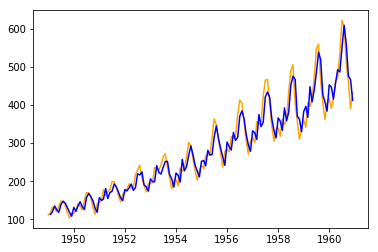

In [25]:
timeseries_predict = timeseries_Log - fit.resid
print(np.sum((timeseries-timeseries_predict)**2))
plt.plot(timeseries, 'orange')
plt.plot(np.exp(timeseries_predict), 'blue')
plt.show()